In [5]:
import pandas as pd

data = pd.read_csv('Malware-staDyn-data.csv')

print(data.shape[0])
data.head()

# data = pd.read_csv('C:/Users/micha/math4ds/StarWarsClean.csv')
# 

6248


,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,count_file_written,count_file_exists,count_file_deleted,count_file_copied,count_file_renamed,count_regkey_written,count_regkey_deleted,count_file_opened,count_dll_loaded,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# yup 
data['label'].value_counts()

1    5653
0     595
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x11261c0c220>,
 [Text(-1.051137863151662, 0.324205479054501, 'malware'),
  Text(1.0511378783288143, -0.3242054298471861, 'benign')])

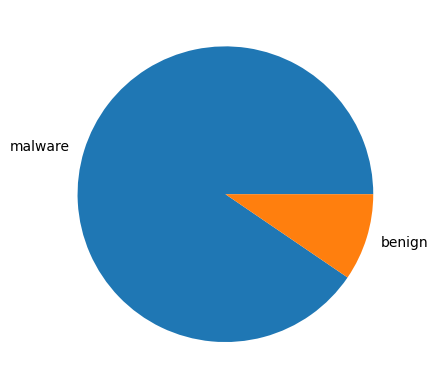

In [29]:
# well seems to work 
import matplotlib.pyplot as plt

labels = 'malware', 'benign'

fig, ax = plt.subplots()
ax.pie(data['label'].value_counts(), labels = labels)

In [46]:
from sklearn import tree

Y = data['label']
X = data.drop(['label'], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf = clf.fit(X,Y)

[Text(0.5, 0.875, 'x[1050] <= 1.5\nentropy = 0.454\nsamples = 6248\nvalue = [595, 5653]'),
 Text(0.25, 0.625, 'x[1052] <= 0.5\nentropy = 0.183\nsamples = 5784\nvalue = [161, 5623]'),
 Text(0.125, 0.375, 'x[1062] <= 65101.0\nentropy = 0.016\nsamples = 4882\nvalue = [7, 4875]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 3366\nvalue = [0, 3366]'),
 Text(0.1875, 0.125, 'entropy = 0.042\nsamples = 1516\nvalue = [7, 1509]'),
 Text(0.375, 0.375, 'x[1009] <= 2.78\nentropy = 0.659\nsamples = 902\nvalue = [154, 748]'),
 Text(0.3125, 0.125, 'entropy = 0.974\nsamples = 202\nvalue = [120, 82]'),
 Text(0.4375, 0.125, 'entropy = 0.28\nsamples = 700\nvalue = [34, 666]'),
 Text(0.75, 0.625, 'x[1051] <= 5.5\nentropy = 0.346\nsamples = 464\nvalue = [434, 30]'),
 Text(0.625, 0.375, 'x[1007] <= 0.031\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.

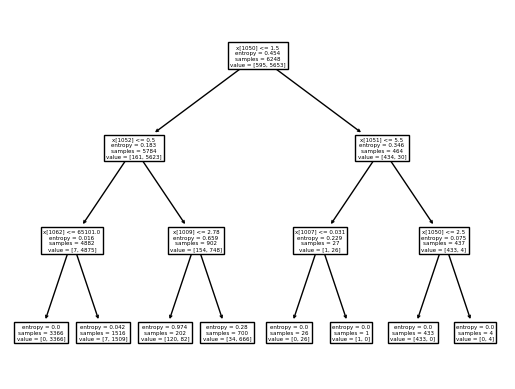

In [47]:
tree.plot_tree(clf)

In [48]:
clf.score(X, Y)

0.9803137003841229